# <center> M7 T01: Pipelines, Grid search i Text mining

## Exercici 1  
Agafa el conjunt de dades que vulguis i realitza un **pipeline** i un **gridsearch** aplicant l'algorisme **Random Forest**.

In [1]:
# Importo algunas de las librerías que voy a utilizar:
import pandas
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

Esta vez voy a partir directamente del dataframe **flights_clean**, que es el que guardé en el ejercicio **M4 T01**, después del proceso de limpieza (y antes del de transformación):

In [2]:
# Importo el dataframe "flights_clean":
flights_clean = pandas.read_csv('./output/DelayedFlights_clean.csv')

flights_clean

,CRSDepTime,DepTime,CRSArrTime,CRSElapsedTime,DepDelay,ArrDelay,UniqueCarrier,Origin,Dest,Distance,Date,Month,Day,DayOfWeek
0,1755,1829,1925,90,34,34,WN,IND,BWI,515,2008-01-03,1,3,4
1,1830,1937,1940,250,67,57,WN,IND,LAS,1591,2008-01-03,1,3,4
2,1510,1644,1725,135,94,80,WN,IND,MCO,828,2008-01-03,1,3,4
3,1425,1452,1625,240,27,15,WN,IND,PHX,1489,2008-01-03,1,3,4
4,1255,1323,1510,135,28,16,WN,IND,TPA,838,2008-01-03,1,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247481,830,921,1008,98,51,64,DL,ATL,PBI,545,2008-12-13,12,13,6
1247482,1520,1552,1718,58,32,17,DL,HSV,ATL,151,2008-12-13,12,13,6
1247483,1220,1250,1552,152,30,25,DL,MSP,ATL,906,2008-12-13,12,13,6
1247484,600,657,749,109,57,75,DL,RIC,ATL,481,2008-12-13,12,13,6


Para no complicarlo (y para ahorrar tiempo de proceso), elimino las columnas categóricas (**UniqueCarrier**, **Origin** y **Dest**), y la columna **Date** (que es una columna de tipo datetime creada por mí):

In [3]:
flights_clean.drop(['UniqueCarrier','Origin','Dest','Date'], axis='columns', inplace=True)

flights_clean

,CRSDepTime,DepTime,CRSArrTime,CRSElapsedTime,DepDelay,ArrDelay,Distance,Month,Day,DayOfWeek
0,1755,1829,1925,90,34,34,515,1,3,4
1,1830,1937,1940,250,67,57,1591,1,3,4
2,1510,1644,1725,135,94,80,828,1,3,4
3,1425,1452,1625,240,27,15,1489,1,3,4
4,1255,1323,1510,135,28,16,838,1,3,4
...,...,...,...,...,...,...,...,...,...,...
1247481,830,921,1008,98,51,64,545,12,13,6
1247482,1520,1552,1718,58,32,17,151,12,13,6
1247483,1220,1250,1552,152,30,25,906,12,13,6
1247484,600,657,749,109,57,75,481,12,13,6


Defino las variables independientes (**X**) y la variable dependiente (**y**), y hago **splits** de entrenamiento y testeo:

In [4]:
# Defino las variables independientes (todas las columnas de "flights_clean", menos 'ArrDelay'):
X = flights_clean.drop('ArrDelay', axis=1)

# Defino la variable dependiente (solo 'ArrDelay'):
y = flights_clean['ArrDelay']

# Separo las partes de entrenamiento y de testeo, con la función "train_test_split":
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Creo un **pipeline** (que ejecutará el escalado **StandardScaler** y el modelo **RandomForestRegressor**), y aplico sobre él la librería **GridSearchCV** (que probará diferentes valores del parámetro **n_estimators**, no muy altos):

In [5]:
# Almaceno los valores del parámetro "n_estimators" de "RandomForestRegressor", que "GridSearchCV" probará:
params = {'random_forest__n_estimators': [10, 20, 30, 40, 50]}

# Creo el pipeline, que ejecutará el escalado y el modelo:
pipeline = Pipeline(steps=[('scaler', StandardScaler()),
                           ('random_forest', RandomForestRegressor())
                          ])

# Creo una instancia de "GridSearchCV", pasándole el pipeline y el diccionario de parámetros:
grid_pipeline = GridSearchCV(pipeline, params)

Aplico el **grid_pipeline** sobre **X_train** e **y_train**:

In [6]:
%%time
grid_pipeline.fit(X_train, y_train)

Wall time: 1h 14min 41s


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('random_forest',
                                        RandomForestRegressor())]),
             param_grid={'random_forest__n_estimators': [10, 20, 30, 40, 50]})

Imprimo el atributo **best_params**, que en este caso incluye al mejor valor del parámetro **n_estimators** (entre los valores especificados en el diccionario **params**):

In [7]:
grid_pipeline.best_params_

{'random_forest__n_estimators': 50}

Una vez obtenidos los valores óptimos de los parámetros, el siguiente paso sería crear un pipeline que ejecute el **escalado** y el **modelo** (con los parámetros obtenidos), y aplicarlo sobre **X_train** e **y_train**:

In [8]:
%%time
# Creo el pipeline, que ejecutará el escalado y el modelo (con el parámero "n_estimators" con valor "50"):
pipeline = Pipeline(steps=[('scaler', StandardScaler()),
                           ('random_forest', RandomForestRegressor(n_estimators=50))
                          ])

# Aplico el pipeline sobre "X_train" e "y_train":
pipeline.fit(X_train, y_train)

Wall time: 5min 43s


Pipeline(steps=[('scaler', StandardScaler()),
                ('random_forest', RandomForestRegressor(n_estimators=50))])

Ya finalizado el entrenamiento, puedo obtener la métrica **R2** desde el propio objeto **pipeline**:

In [9]:
pipeline.score(X_test, y_test)

0.9097042035849

Y también puedo hacer una predicción, y en base a sus resultados obtener las métricas **R2** y **MSE** (como hicimos en el ejercicio correspondiente a los modelos de Regresión):

In [10]:
# Importo las librerias necesarias para obtener las métricas "R2" y "MSE":
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Utilizo la función "predict" para hacer predicciones con el modelo:
pipeline_pred = pipeline.predict(X_test)

# Obtengo y almaceno el R2:
forest_reg_R2 = r2_score(y_test, pipeline_pred)

# Obtengo y almaceno el MSE:
forest_reg_MSE = mean_squared_error(y_test, pipeline_pred)

print(f"R2: {forest_reg_R2:.3f}")
print(f"MSE: {forest_reg_MSE:.3f}")

R2: 0.910
MSE: 328.664


---
## Exercici 1b  
Debo confesar que la decisión de eliminar las columnas categóricas no se debía solo al hecho de ahorrar tiempo de proceso (que al final fue poco), sino también a sortear el "marrón" de codificar las columnas categóricas dentro de un pipeline.  
He estado buscando información y he visto que se puede crear **sub-pipelines** diferenciados para las columnas numéricas (a las que escalar) y para las columnas categóricas (a las que codificar), con ayuda de la librería **ColumnTransformer**, así que voy a probarlo (pero sin comprobar parámetros con **GridSearchCV**, sino ejecutando el modelo directamente con los parámetros obtenidos en el anterior ejercicio).

In [2]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [3]:
# Importo el dataframe "flights_clean":
flights_clean = pandas.read_csv('./output/DelayedFlights_clean.csv')

flights_clean

,CRSDepTime,DepTime,CRSArrTime,CRSElapsedTime,DepDelay,ArrDelay,UniqueCarrier,Origin,Dest,Distance,Date,Month,Day,DayOfWeek
0,1755,1829,1925,90,34,34,WN,IND,BWI,515,2008-01-03,1,3,4
1,1830,1937,1940,250,67,57,WN,IND,LAS,1591,2008-01-03,1,3,4
2,1510,1644,1725,135,94,80,WN,IND,MCO,828,2008-01-03,1,3,4
3,1425,1452,1625,240,27,15,WN,IND,PHX,1489,2008-01-03,1,3,4
4,1255,1323,1510,135,28,16,WN,IND,TPA,838,2008-01-03,1,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247481,830,921,1008,98,51,64,DL,ATL,PBI,545,2008-12-13,12,13,6
1247482,1520,1552,1718,58,32,17,DL,HSV,ATL,151,2008-12-13,12,13,6
1247483,1220,1250,1552,152,30,25,DL,MSP,ATL,906,2008-12-13,12,13,6
1247484,600,657,749,109,57,75,DL,RIC,ATL,481,2008-12-13,12,13,6


Elimino la columna **Date**, que ya está reflejada en otras variables:

In [4]:
flights_clean.drop(['Date'], axis='columns', inplace=True)

Defino las variables independientes (**X**) y la variable dependiente (**y**), y hago **splits** de entrenamiento y testeo:

In [5]:
# Defino las variables independientes (todas las columnas de "flights_clean", menos 'ArrDelay'):
X = flights_clean.drop('ArrDelay', axis=1)

# Defino la variable dependiente (solo 'ArrDelay'):
y = flights_clean['ArrDelay']

# Separo las partes de entrenamiento y de testeo, con la función "train_test_split":
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Almaceno en listas las columnas numéricas y las columnas categóricas (solo las de **X**, o devolverá error por la columna objetivo, al ejecutar el grid_pipeline):

In [6]:
num_cols = X_train.select_dtypes(include=['int64']).columns.tolist()

cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()

Creo un **pipeline** para las columnas numéricas (que las escalará con **StandardScaler**) y otro para las columnas categóricas (que las codificará con **OneHotEncoder**):

In [7]:
num_pipeline = Pipeline(steps=[('scaler', StandardScaler())])

cat_pipeline = Pipeline(steps=[('one_hot', OneHotEncoder(handle_unknown = 'ignore'))])

Utilizo la librería **ColumnTransformer** para aplicar los pipelines de transformación a las columnas correspondientes:

In [8]:
preprocessor = ColumnTransformer(transformers=[('num', num_pipeline, num_cols),
                                                ('cat', cat_pipeline, cat_cols)
                                                ], 
                                    remainder = 'passthrough')

Creo el pipeline final, que ejecutará los **sub-pipelines de preprocesado** y el **modelo** (con el parámetro **n_estimators=50**), y lo aplico sobre **X-train** e **y_train**:

In [9]:
%%time
# Creo el pipeline, que ejecutará los sub-pipelines de preprocesado y el modelo (con el parámero "n_estimators" con valor "50"):
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('random_forest', RandomForestRegressor(n_estimators=50))
                          ])

# Aplico el pipeline sobre "X_train" e "y_train":
pipeline.fit(X_train, y_train)

Wall time: 21h 56min 20s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['CRSDepTime', 'DepTime',
                                                   'CRSArrTime',
                                                   'CRSElapsedTime', 'DepDelay',
                                                   'Distance', 'Month', 'Day',
                                                   'DayOfWeek']),
                                                 ('cat',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['UniqueCarrier', 'Orig

> Pfff, es muy raro que haya tardado tanto, pero no me cuadra que sea por el PC, porque cuando no hay columnas dummies la ejecución es muy rápida (tardó solo 5 minutos en el ejercicio anterior).  
> También hice la prueba de ejecutar solamente la parte de preprocesado (los dos **sub-pipelines**) y tardó solo un segundo, como era de esperar.  
> Aparte, el PC no se queda bloqueado en ningún momento, y siempre se escucha que "algo está haciendo". No sé, es un misterio.

Hago una predicción y obtengo las métricas **R2** y **MSE**:

In [12]:
# Utilizo la función "predict" para hacer predicciones con el modelo:
pipeline_pred = pipeline.predict(X_test)

# Obtengo y almaceno el R2:
forest_reg2_R2 = r2_score(y_test, pipeline_pred)

# Obtengo y almaceno el MSE:
forest_reg2_MSE = mean_squared_error(y_test, pipeline_pred)

print(f"R2: {forest_reg2_R2:.3f}")
print(f"MSE: {forest_reg2_MSE:.3f}")

R2: 0.912
MSE: 319.924


Ya puestos, hago un **gráfico para comparar las métricas** del modelo en el que no usé las variables categóricas (en el **ejercicio 1**) con las métricas del modelo en el que no las usé (en el **ejercicio 1b**).  
La verdad es que la mejora es mínima, y el gasto computacional enorme.  

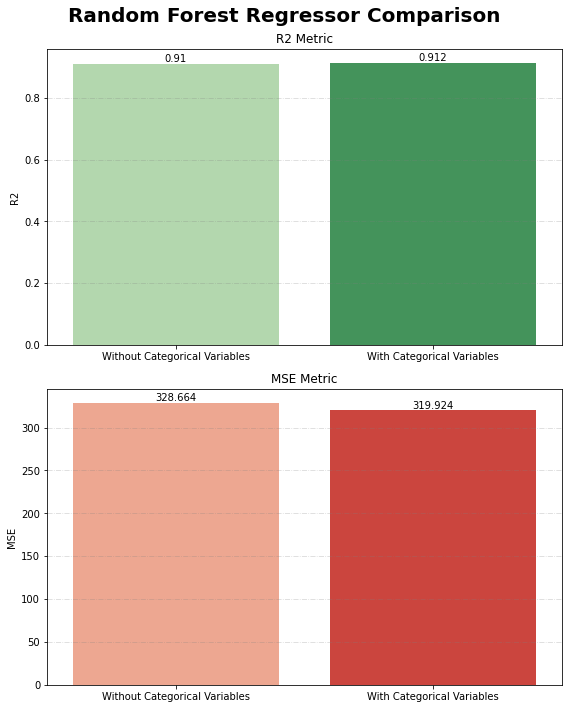

In [32]:
import matplotlib.pyplot as plt
import seaborn as sbrn

fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(8, 10))
sbrn.barplot(x=['Without Categorical Variables','With Categorical Variables'], y=[0.910, 0.912], palette='Greens', ax=ax1)
sbrn.barplot(x=['Without Categorical Variables','With Categorical Variables'], y=[328.664, 319.924], palette='Reds', ax=ax2)
for container in ax1.containers:
    ax1.bar_label(container)
for container in ax2.containers:
    ax2.bar_label(container)
ax1.grid(axis='y', color='gray', linestyle='dashdot', alpha=0.3)
ax2.grid(axis='y', color='gray', linestyle='dashdot', alpha=0.3)
plt.suptitle("Random Forest Regressor Comparison", fontsize=20, fontweight='bold')
ax1.set_title("R2 Metric")
ax2.set_title("MSE Metric")
ax1.set_ylabel("R2")
ax2.set_ylabel("MSE")
plt.tight_layout();

> Como conclusión del primer ejercicio diría que me parece una muy buena idea realizar el preprocesado directamente al ejecutar el modelo, mediante **pipelines** (de forma "interna", por decirlo así), ya que el dataframe con las columnas numéricas escaladas y/o con las columnas categóricas codificadas no aporta nada al "ojo Humano", sino mas bien todo lo contrario.  
> Por otra parte, también es muy cómodo utilizar **GridSearch** para probar combinaciones de parámetros de forma automatizada, a pesar de que multiplique el tiempo de ejecución.

---
## Exercici 2  
Agafa un **text en anglès** que vulguis, i calcula'n la **freqüència de les paraules**.

In [33]:
# Importo las librerías que voy a utilizar:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

Almaceno un texto en una variable:

In [34]:
text_var = """Totalitarianism is a form of government and a political system that prohibits all opposition parties,
                outlaws individual opposition to the State and its claims, and exercises an extremely high degree of control and regulation over public and private life.
                It is regarded as the most extreme and complete form of authoritarianism.
                In totalitarian states, political power is often held by autocrats, such as dictators and absolute monarchs,
                who employ all-encompassing campaigns in which propaganda is broadcast by state-controlled mass media in order to control the citizenry"""

Almaceno las palabras contenidas en el texto en una lista, mediante **word_tokenize**:

In [35]:
word_list = word_tokenize(text_var)

print(word_list)

['Totalitarianism', 'is', 'a', 'form', 'of', 'government', 'and', 'a', 'political', 'system', 'that', 'prohibits', 'all', 'opposition', 'parties', ',', 'outlaws', 'individual', 'opposition', 'to', 'the', 'State', 'and', 'its', 'claims', ',', 'and', 'exercises', 'an', 'extremely', 'high', 'degree', 'of', 'control', 'and', 'regulation', 'over', 'public', 'and', 'private', 'life', '.', 'It', 'is', 'regarded', 'as', 'the', 'most', 'extreme', 'and', 'complete', 'form', 'of', 'authoritarianism', '.', 'In', 'totalitarian', 'states', ',', 'political', 'power', 'is', 'often', 'held', 'by', 'autocrats', ',', 'such', 'as', 'dictators', 'and', 'absolute', 'monarchs', ',', 'who', 'employ', 'all-encompassing', 'campaigns', 'in', 'which', 'propaganda', 'is', 'broadcast', 'by', 'state-controlled', 'mass', 'media', 'in', 'order', 'to', 'control', 'the', 'citizenry']


Calculo la frecuencia de las palabras, mediante **FreqDist**. Nos dice que hay **99** palabras, y **66** palabras únicas:

In [36]:
word_frequency = FreqDist(word_list)

print(word_frequency)

<FreqDist with 66 samples and 93 outcomes>


Con la función **dict** puedo obtener la frecuencia correspondiente a cada una de las palabras:

In [37]:
print(dict(word_frequency))

{'Totalitarianism': 1, 'is': 4, 'a': 2, 'form': 2, 'of': 3, 'government': 1, 'and': 7, 'political': 2, 'system': 1, 'that': 1, 'prohibits': 1, 'all': 1, 'opposition': 2, 'parties': 1, ',': 5, 'outlaws': 1, 'individual': 1, 'to': 2, 'the': 3, 'State': 1, 'its': 1, 'claims': 1, 'exercises': 1, 'an': 1, 'extremely': 1, 'high': 1, 'degree': 1, 'control': 2, 'regulation': 1, 'over': 1, 'public': 1, 'private': 1, 'life': 1, '.': 2, 'It': 1, 'regarded': 1, 'as': 2, 'most': 1, 'extreme': 1, 'complete': 1, 'authoritarianism': 1, 'In': 1, 'totalitarian': 1, 'states': 1, 'power': 1, 'often': 1, 'held': 1, 'by': 2, 'autocrats': 1, 'such': 1, 'dictators': 1, 'absolute': 1, 'monarchs': 1, 'who': 1, 'employ': 1, 'all-encompassing': 1, 'campaigns': 1, 'in': 2, 'which': 1, 'propaganda': 1, 'broadcast': 1, 'state-controlled': 1, 'mass': 1, 'media': 1, 'order': 1, 'citizenry': 1}


También puedo usar la función **most_common** (aplicada sobre el objeto que devuelve **FreqDist**) para devolver las palabras ordenadas por frecuencia, de forma descendente:

In [38]:
word_frequency.most_common()

[('and', 7),
 (',', 5),
 ('is', 4),
 ('of', 3),
 ('the', 3),
 ('a', 2),
 ('form', 2),
 ('political', 2),
 ('opposition', 2),
 ('to', 2),
 ('control', 2),
 ('.', 2),
 ('as', 2),
 ('by', 2),
 ('in', 2),
 ('Totalitarianism', 1),
 ('government', 1),
 ('system', 1),
 ('that', 1),
 ('prohibits', 1),
 ('all', 1),
 ('parties', 1),
 ('outlaws', 1),
 ('individual', 1),
 ('State', 1),
 ('its', 1),
 ('claims', 1),
 ('exercises', 1),
 ('an', 1),
 ('extremely', 1),
 ('high', 1),
 ('degree', 1),
 ('regulation', 1),
 ('over', 1),
 ('public', 1),
 ('private', 1),
 ('life', 1),
 ('It', 1),
 ('regarded', 1),
 ('most', 1),
 ('extreme', 1),
 ('complete', 1),
 ('authoritarianism', 1),
 ('In', 1),
 ('totalitarian', 1),
 ('states', 1),
 ('power', 1),
 ('often', 1),
 ('held', 1),
 ('autocrats', 1),
 ('such', 1),
 ('dictators', 1),
 ('absolute', 1),
 ('monarchs', 1),
 ('who', 1),
 ('employ', 1),
 ('all-encompassing', 1),
 ('campaigns', 1),
 ('which', 1),
 ('propaganda', 1),
 ('broadcast', 1),
 ('state-controlle

Y puedo pasarle la cantidad de palabras a devolver como parámetro:

In [39]:
word_frequency.most_common(10)

[('and', 7),
 (',', 5),
 ('is', 4),
 ('of', 3),
 ('the', 3),
 ('a', 2),
 ('form', 2),
 ('political', 2),
 ('opposition', 2),
 ('to', 2)]

---
## Exercici 3
Treu les **stopwords** i realitza **stemming** al teu conjunt de dades.

In [40]:
# Importo las librerías que voy a utilizar:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

Almaceno las **stopwords** correspondientes al idioma inglés, y las imprimo:

In [41]:
stop_words = set(stopwords.words('english'))

print(stop_words)

{'same', 'into', 'any', "mightn't", "it's", 'at', 'aren', 'through', 'or', 'above', 'should', 'all', 'no', 'up', 'we', "you've", 'to', 'themselves', 'own', 'you', 'don', 'me', 'ours', 'theirs', "should've", 'she', 'both', 'below', 'but', 'now', 'his', "shan't", 've', 'against', 'o', 'for', 'mightn', 'because', 'with', 'whom', "you're", 'it', 'does', 'over', "shouldn't", 'doing', 'under', 'he', "hasn't", "wouldn't", 'of', "doesn't", "hadn't", 'itself', 'won', 'haven', 'who', 'out', 'himself', "isn't", 'them', 'and', 'which', 'too', 'isn', 'being', 'until', "wasn't", 'be', 'before', 'once', 'a', 'other', 'that', 'very', 'were', "mustn't", 'him', 'will', 'just', 'm', 'couldn', 'am', "needn't", 'shouldn', 'been', 'are', 'if', 'their', 'hers', 'off', 'ourselves', 'was', 'when', 'wasn', 'mustn', "weren't", 'not', 'during', "you'd", 'further', 'shan', 'is', 'this', "she's", 'where', 'her', 'hasn', 'had', 'didn', 'some', 'after', 'having', 'yourselves', 'more', 're', 'between', 'wouldn', 'abou

Elimino las **stopwords** del texto, mediante un bucle, e imprimo los resultados:

In [42]:
# Declaro una lista vacia, para almacenar las palabras "filtradas":
filtered_words = []

# Itero la lista de palabras contenidas en el texto,
#   y añado a la lista de palabras filtradas las que no son "stopwords":
for word in word_list:
    if word not in stop_words:
        filtered_words.append(word)
        
print(filtered_words)

['Totalitarianism', 'form', 'government', 'political', 'system', 'prohibits', 'opposition', 'parties', ',', 'outlaws', 'individual', 'opposition', 'State', 'claims', ',', 'exercises', 'extremely', 'high', 'degree', 'control', 'regulation', 'public', 'private', 'life', '.', 'It', 'regarded', 'extreme', 'complete', 'form', 'authoritarianism', '.', 'In', 'totalitarian', 'states', ',', 'political', 'power', 'often', 'held', 'autocrats', ',', 'dictators', 'absolute', 'monarchs', ',', 'employ', 'all-encompassing', 'campaigns', 'propaganda', 'broadcast', 'state-controlled', 'mass', 'media', 'order', 'control', 'citizenry']


Realizo **stemming** sobre las palabras filtradas (sin "stopwords"), mediante **PorterStemmer**:

In [43]:
# Declaro una lista vacia, para almacenar las palabras "normalizadas":
stemmed_words = []

# Itero la lista de palabras contenidas en el texto (sin "stopwords"),
#   las normalizo mediante "PorterStemmer" y las añado a la lista "stemmed_words":
for word in filtered_words:
    stemmed_words.append(PorterStemmer().stem(word))
        
print(stemmed_words)

['totalitarian', 'form', 'govern', 'polit', 'system', 'prohibit', 'opposit', 'parti', ',', 'outlaw', 'individu', 'opposit', 'state', 'claim', ',', 'exercis', 'extrem', 'high', 'degre', 'control', 'regul', 'public', 'privat', 'life', '.', 'it', 'regard', 'extrem', 'complet', 'form', 'authoritarian', '.', 'in', 'totalitarian', 'state', ',', 'polit', 'power', 'often', 'held', 'autocrat', ',', 'dictat', 'absolut', 'monarch', ',', 'employ', 'all-encompass', 'campaign', 'propaganda', 'broadcast', 'state-control', 'mass', 'media', 'order', 'control', 'citizenri']


---
## Exercici 4
Realitza **sentiment analysis** al teu conjunt de dades.

In [2]:
# Importo las librerías que voy a utilizar:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
from textblob import TextBlob
from nltk.corpus import sentiwordnet
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from statistics import mean

Almaceno un tweet en una variable:

In [3]:
tweet = "It can be difficult to find the time and space in our lives for things that are important for our wellbeing, like meditation and exercise. Accepting this is an important part of the practice."

Sustituyo los caracteres especiales, números y puntuaciones con espacios, mediante la librería **re** (manteniendo solamente caracteres alfabéticos y espacios):

In [4]:
clean_tweet = re.sub('[^A-Za-z]+', ' ', tweet)

clean_tweet

'It can be difficult to find the time and space in our lives for things that are important for our wellbeing like meditation and exercise Accepting this is an important part of the practice '

Almaceno las palabras contenidas en el tweet en una lista, mediante **word_tokenize**:

In [5]:
tweet_words = word_tokenize(clean_tweet)

print(tweet_words)

['It', 'can', 'be', 'difficult', 'to', 'find', 'the', 'time', 'and', 'space', 'in', 'our', 'lives', 'for', 'things', 'that', 'are', 'important', 'for', 'our', 'wellbeing', 'like', 'meditation', 'and', 'exercise', 'Accepting', 'this', 'is', 'an', 'important', 'part', 'of', 'the', 'practice']


Elimino las **stopwords**:

In [6]:
# Almaceno las "stopwords" correspondientes al inglés:
stop_words = set(stopwords.words('english'))

# Declaro una lista vacia, para almacenar las palabras "filtradas":
filtered_tweet_words = []

# Itero la lista de palabras contenidas en el tweet,
#   y añado a la lista de palabras filtradas las que no son "stopwords":
for word in tweet_words:
    if word.lower() not in stop_words:
        filtered_tweet_words.append(word)
        
print(filtered_tweet_words)

['difficult', 'find', 'time', 'space', 'lives', 'things', 'important', 'wellbeing', 'like', 'meditation', 'exercise', 'Accepting', 'important', 'part', 'practice']


Aplico **POS Tagging** sobre las palabras filtradas:

In [7]:
tagged_tweet_words = pos_tag(filtered_tweet_words)

tagged_tweet_words

[('difficult', 'JJ'),
 ('find', 'VB'),
 ('time', 'NN'),
 ('space', 'NN'),
 ('lives', 'VBZ'),
 ('things', 'NNS'),
 ('important', 'JJ'),
 ('wellbeing', 'VBG'),
 ('like', 'IN'),
 ('meditation', 'NN'),
 ('exercise', 'NN'),
 ('Accepting', 'NNP'),
 ('important', 'JJ'),
 ('part', 'NN'),
 ('practice', 'NN')]

**Vuelvo a taggear** las palabras filtradas (manualmente, y con ayuda de la librería **wordnet**), para que dichos tags sean comprensibles por algunas de las librerías que utilizaré posteriormente:

In [8]:
# Declaro una lista vacia, para almacenar las palabras "re-taggeadas":
retagged_tweet_words = []

# Almaceno los tags a aplicar. basados en el tipo de palabra:
tag_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

# Itero la lista de palabras taggeadas, para volver a almacenarlas en la lista "retagged_tweet_words",
#   pero esta vez con los tags almacenados en "tag_dict":
for word, tag in tagged_tweet_words:
    #retagged_tweet_words.append(list([word, tag_dict.get(tag[0])]))
    retagged_tweet_words.append(list([word, tag_dict.get(tag[0])]))
    
retagged_tweet_words

[['difficult', 'a'],
 ['find', 'v'],
 ['time', 'n'],
 ['space', 'n'],
 ['lives', 'v'],
 ['things', 'n'],
 ['important', 'a'],
 ['wellbeing', 'v'],
 ['like', None],
 ['meditation', 'n'],
 ['exercise', 'n'],
 ['Accepting', 'n'],
 ['important', 'a'],
 ['part', 'n'],
 ['practice', 'n']]

Utilizo la la librería **sentiwordnet** para hacer **sentiment analysis** (que esta librería hace palabra por palabra), y almaceno los resultados en un dataframe, normalizando previamente las palabras con **WordNetLemmatizer**:

In [9]:
# Declaro un dataframe vacío, para almacenar los resultados:
sentiwordnet_df = pandas.DataFrame(columns=['WORD','POSITIVE','NEGATIVE','OBJECTIVITY'])

# Itero la lista de palabras "re-taggeadas", para normalizar cada una con la librería "WordNetLemmatizer"
#   y obtener los sentimientos asociados con la librería "sentiwordnet", que almaceno en el dataframe:
for word, tag in retagged_tweet_words:
    if not tag:
        lemma = word
    else:
        lemma = WordNetLemmatizer().lemmatize(word, pos=tag)
    sysnets = sentiwordnet.senti_synsets(lemma, tag)
    # Es necesario un "try/except" porque algunas palabras pueden no tener resultados:
    try:
        first_sysnet = list(sysnets)[0]
        sentiwordnet_df.loc[len(sentiwordnet_df)] = [lemma, first_sysnet.pos_score(), first_sysnet.neg_score(), first_sysnet.obj_score()]
    except Exception:
        continue

sentiwordnet_df

,WORD,POSITIVE,NEGATIVE,OBJECTIVITY
0,difficult,0.000,0.750,0.250
1,find,0.000,0.000,1.000
2,time,0.000,0.000,1.000
3,space,0.000,0.000,1.000
4,live,0.000,0.000,1.000
5,thing,0.000,0.000,1.000
6,important,0.875,0.000,0.125
7,like,0.125,0.000,0.875
8,meditation,0.000,0.000,1.000
9,exercise,0.000,0.000,1.000


Las métricas **Positive**, **Negative** y **Objectivity** tienen un rango de **0** a **1**, pero aplican a cada palabra por separado.  
Para calcular esas métricas con respecto a todo el tweet podemos obtener la media de la métrica **Objectivity**, y sumar los valores de las métricas **Positive** y **Negative** (que ya no estarán limitadas a un límite superior de **1**, debido a la suma):

In [10]:
print(f"Objectivity: {sentiwordnet_df['OBJECTIVITY'].mean().round(3)}")
print(f"Positivity: {sentiwordnet_df['POSITIVE'].sum().round(3)}")
print(f"Negativity: {sentiwordnet_df['NEGATIVE'].sum().round(3)}")

Objectivity: 0.769
Positivity: 2.125
Negativity: 0.875


Y podemos restar la suma de los valores de **Negative** a la suma de los valores de **Positive**, para obtener el balance entre dichas métricas. El resultado será **mayor que 0** si el balance es positivo y **menor que 0** si el balance es negativo:

In [11]:
print(f"Positivity/Negativity Balance: {(sentiwordnet_df['POSITIVE'].sum() - sentiwordnet_df['NEGATIVE'].sum())}")

Positivity/Negativity Balance: 1.25


En realidad no es necesario almacenar los resultados en un dataframe y luego calcular los valores finales, sino que podemos **calcularlos directamente** (con la ayuda de una variable y una lista):

In [12]:
# Declaro una variable (iniciada a "0") para almacenar el resultado de los sentimientos positivos menos los sentimientos negativos,
#   y una lista para almacenar los resultados de objetividad (para luego obtener la media):
sentiment_result = 0
objectivity = []

# Itero la lista de palabras "re-taggeadas", para normalizar cada una con la librería "WordNetLemmatizer"
#   y obtener los sentimientos asociados con la librería "sentiwordnet", que almaceno en la variable "sentiment_result" y en la lista "objectivity":
for word, tag in retagged_tweet_words:
    if not tag:
        lemma = word
    else:
        lemma = WordNetLemmatizer().lemmatize(word, pos=tag)
    sysnets = sentiwordnet.senti_synsets(lemma, tag)
    # Es necesario un "try/except" porque algunas palabras pueden no tener resultados:
    try:
        first_sysnet = list(sysnets)[0]
        sentiment_result += first_sysnet.pos_score() - first_sysnet.neg_score()
        objectivity.append(first_sysnet.obj_score())
    except Exception:
        continue

print(f"Objectivity: {round(mean(objectivity),3)}")
print(f"Positivity/Negativity Balance: {sentiment_result}")

Objectivity: 0.769
Positivity/Negativity Balance: 1.25


Otras librerías, como **TextBlob**, no hacen el análisis palabra por palabra, sino sobre todo el texto.  
Para utlizarla es necesario volver a guardar las palabras en un string, normalizándolas previamente mediante **WordNetLemmatizer**:

In [13]:
# Declaro un string vacío, para almacenar el tweet final (ya "lemmatizado"):
lemmatized_tweet = ""

# Itero la lista de palabras "re-taggeadas", y las concateno en el string "lemmatized_tweet"
#   una vez normalizadas mediante "WordNetLemmatizer":
for word, tag in retagged_tweet_words:
    if not tag:
        lemma = word
    else:
        lemma = WordNetLemmatizer().lemmatize(word, pos=tag)
    lemmatized_tweet = lemmatized_tweet + " " + lemma    

print(lemmatized_tweet)

 difficult find time space live thing important wellbeing like meditation exercise Accepting important part practice


Una vez creado el string a analizar, aplico sobre él la librería **TextBlob**, e imprimo los resultados, que difieren bastante de los obtenidos por la librería **sentiwordnet**.  
NOTA: El rango de la métrica **Polarity** va de **-1** a **1**, y el rango de la métrica **Subjectivity** va de **0** a **1**.

In [14]:
sentyment_analysis = TextBlob(lemmatized_tweet)

sentyment_analysis.sentiment

Sentiment(polarity=0.1090909090909091, subjectivity=0.875)

Otra librería que hace el análisis sobre todo el texto es **VADER**, que además devuelve más métricas.  
Las métricas **pos**, **neg** y **neu** hacen referencia a los sentimientos positvos, negativos y neutros, respectivamente (y el resultado de sumar sus valores siempre es **1**), y la métrica **compound** es una métrica compuesta (con rango de **-1** a **1**) que puede ser utilizada como resumen. El sentimiento del texto será **negativo** si su valor es **menor o igual a -0.5**, será **neutro** si su valor es **mayor que -0.5 y menor que 0.5**, y será **positivo** si su valor es **mayor o igual a 0.5**.

In [15]:
sentyment_analysis = SentimentIntensityAnalyzer().polarity_scores(lemmatized_tweet)

sentyment_analysis

{'neg': 0.118, 'neu': 0.472, 'pos': 0.41, 'compound': 0.6369}

> Está bien eso de analizar textos automáticamente, pero es llamativa la diferencia de resultados entre las diferentes librerias. Por ejemplo, al tweet que he analizado la librería **TextBlob** le ha asignado un valor de **subjetivity** de **0.875**, y la librería **sentiwordnet** le ha asignado un valor de **objectivity** de **0.769**. Lámame exquisito, pero diría que eso demuesta que queda mucho por hacer en el campo del **sentiment analysis**.  
> Por otra parte, he intentado utilizar un texto en castellano, pero me he encontrado con problemas a la hora de realizar el **taggeado**, y supongo que también me los hubiera encontrado posteriormente, al realizar la **lemmatización**. Habrá que mirarlo con más detenimiento.

---